# Depth Estimation with Depth Anything V3
Single-image depth estimation using the Depth Anything 3 model.

In [1]:
import sys
import os

# Add Depth-Anything-3 src to Python path
DA3_SRC = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'Depth-Anything-3', 'src'))
sys.path.insert(0, DA3_SRC)

# Repo root (two levels up from analysis/tutorials/)
ROOT = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

import torch
import numpy as np
import matplotlib.pyplot as plt
from depth_anything_3.api import DepthAnything3

[WARN ] Dependency `gsplat` is required for rendering 3DGS. Install via: pip install git+https://github.com/nerfstudio-project/gsplat.git@0b4dddf04cb687367602c01196913cde6a743d70


In [ ]:
def load_model(model_name="depth-anything/DA3NESTED-GIANT-LARGE-1.1"):
    """Load a Depth Anything V3 model onto GPU (or CPU fallback)."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Loading model: {model_name} on {device} ...")
    model = DepthAnything3.from_pretrained(model_name).to(device=device)
    return model

In [3]:
def estimate_depth(model, image_path):
    """Run depth inference on a single image. Returns the depth map as a 2D numpy array."""
    print(f"Running inference on: {image_path}")
    prediction = model.inference([image_path])
    depth = prediction.depth[0]  # [H, W] float32
    return depth

In [4]:
def save_and_show_depth(depth, output_path, cmap="inferno"):
    """Save the depth map as a colormapped image and display it inline."""
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.imsave(output_path, depth, cmap=cmap)
    print(f"Depth map saved to: {output_path}")

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes[0].imshow(plt.imread(input_path))
    axes[0].set_title("Input Image")
    axes[0].axis("off")
    axes[1].imshow(depth, cmap=cmap)
    axes[1].set_title("Depth Map")
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()

# Run Depth Estimation
Set your input/output paths below and run this cell.

Loading model: depth-anything/DA3NESTED-GIANT-LARGE-1.1 on cuda ...
[INFO ] using SwiGLU layer as FFN
[INFO ] using MLP layer as FFN
Running inference on: /home/navlab/sukeerth/Tree/TreeHacks/treehacks-2026/analysis/data/depth/begreen-vboardmaster-office-5.jpg
[INFO ] Processed Images Done taking 0.1854398250579834 seconds. Shape:  torch.Size([1, 3, 504, 504])
[INFO ] Model Forward Pass Done. Time: 0.9099781513214111 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007200241088867188 seconds
Depth map saved to: /home/navlab/sukeerth/Tree/TreeHacks/treehacks-2026/analysis/outputs/depth/begreen-vboardmaster-office-5.png


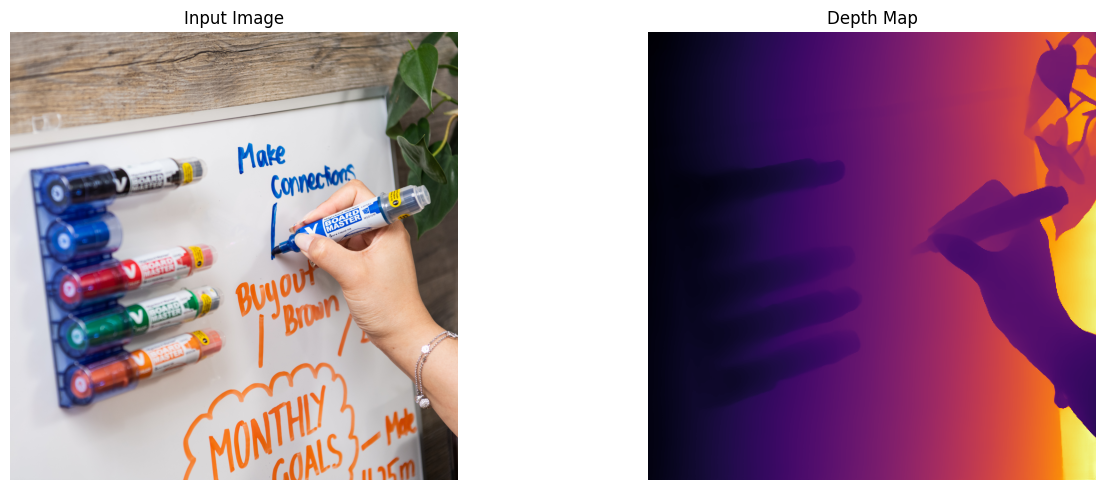

In [6]:
# ---- Hyperparameters (paths relative to repo root) ----
input_path  = "analysis/data/depth/begreen-vboardmaster-office-5.jpg"
output_path = "analysis/outputs/depth/begreen-vboardmaster-office-5.png"
model_name  = "depth-anything/DA3NESTED-GIANT-LARGE-1.1"
# --------------------------------------------------------

input_path  = os.path.join(ROOT, input_path)
output_path = os.path.join(ROOT, output_path)

model = load_model(model_name)
depth = estimate_depth(model, input_path)
save_and_show_depth(depth, output_path)